In [1]:
import requests
import os 
import csv
import pandas as pd
# Construct the URL for the API call
symbol = 'AMZN'
api_key = 'OQLLSP66PGYDG45E'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={api_key}&outputsize=full'


# Make the API call and retrieve the data
response = requests.get(url)
data = response.json()


In [2]:
print(type(response))

<class 'requests.models.Response'>


In [3]:
time_series_daily = data['Time Series (Daily)']

In [4]:
# Create a CSV file and write the headers to it
with open('stock_data_AMZN.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    headers = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    csv_writer.writerow(headers)

    # Loop through the historic stock data and write it to the CSV file
    for date, daily_data in time_series_daily.items():
        row = [date, daily_data['1. open'], daily_data['2. high'], daily_data['3. low'], daily_data['4. close'], daily_data['6. volume']]
        csv_writer.writerow(row)

# Close the CSV file
csv_file.close()

In [5]:
import pandas as pd
import numpy as np


In [7]:
data = pd.read_csv('stock_data_AMZN.csv')

In [8]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2023-04-06,100.75,102.3817,99.8008,102.06,43560984
1,2023-04-05,103.91,103.9100,100.7506,101.10,45175393
2,2023-04-04,102.75,104.2000,102.1100,103.95,48662496
3,2023-04-03,102.30,103.2900,101.4300,102.41,41135733
4,2023-03-31,102.16,103.4900,101.9500,103.29,56750317


In [9]:
data.tail()

,Date,Open,High,Low,Close,Volume
5891,1999-11-05,64.75,65.50,62.25,64.94,11091400
5892,1999-11-04,67.19,67.19,61.00,63.06,16759200
5893,1999-11-03,68.19,68.50,65.00,65.81,10772100
5894,1999-11-02,69.75,70.00,65.06,66.44,13243200
5895,1999-11-01,68.06,71.88,66.31,69.13,12824100


Predicting the closing price stock price of APPLE inc:

In [10]:
# Create a new dataframe with only the 'Close column 
df = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

5602

In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02579293],
       [0.02553524],
       [0.02630025],
       ...,
       [0.01606253],
       [0.01623164],
       [0.0169537 ]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
import pickle

# Load the model from a file
with open('model.pickle', 'rb') as file:
    model = pickle.load(file)



In [15]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 [==============================] - 2s 37ms/step


8.312230402908282

In [16]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate the model accuracy score
accuracy_score = 1 - mse / np.var(y_test)

print("Model accuracy score:", accuracy_score)


Model accuracy score: 0.8373585256486378


In [19]:
# Make a prediction on the testing data
y_pred = model.predict(x_test)

10/10 [==============================] - 1s 66ms/step


In [21]:
# Print the predicted values and the actual values
print('Predicted:', y_pred)
print('Actual:', y_test)

Predicted: [[0.00085492]
 [0.00123856]
 [0.00128794]
 [0.00129412]
 [0.00104241]
 [0.00087835]
 [0.00109818]
 [0.00147026]
 [0.00189048]
 [0.00256265]
 [0.00275081]
 [0.00296569]
 [0.00340759]
 [0.0034505 ]
 [0.00310059]
 [0.00259332]
 [0.00282608]
 [0.00325988]
 [0.00362776]
 [0.00339758]
 [0.00330105]
 [0.00367941]
 [0.00348393]
 [0.00392462]
 [0.00426753]
 [0.00369786]
 [0.00329561]
 [0.00345528]
 [0.00383392]
 [0.00403836]
 [0.00439901]
 [0.00441931]
 [0.00420056]
 [0.00451777]
 [0.00485943]
 [0.00544145]
 [0.0061863 ]
 [0.00635673]
 [0.00655044]
 [0.00699682]
 [0.00671809]
 [0.0064512 ]
 [0.00569043]
 [0.00592065]
 [0.0062803 ]
 [0.0055132 ]
 [0.00479873]
 [0.0046587 ]
 [0.00480138]
 [0.00432433]
 [0.00367698]
 [0.00289483]
 [0.00307111]
 [0.00393091]
 [0.00365594]
 [0.00398769]
 [0.00459121]
 [0.00472277]
 [0.00499898]
 [0.00544245]
 [0.006021  ]
 [0.00603297]
 [0.00614348]
 [0.00663491]
 [0.00708621]
 [0.00684097]
 [0.00705708]
 [0.00725959]
 [0.00751375]
 [0.00734833]
 [0.00681

<ipython-input-23-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


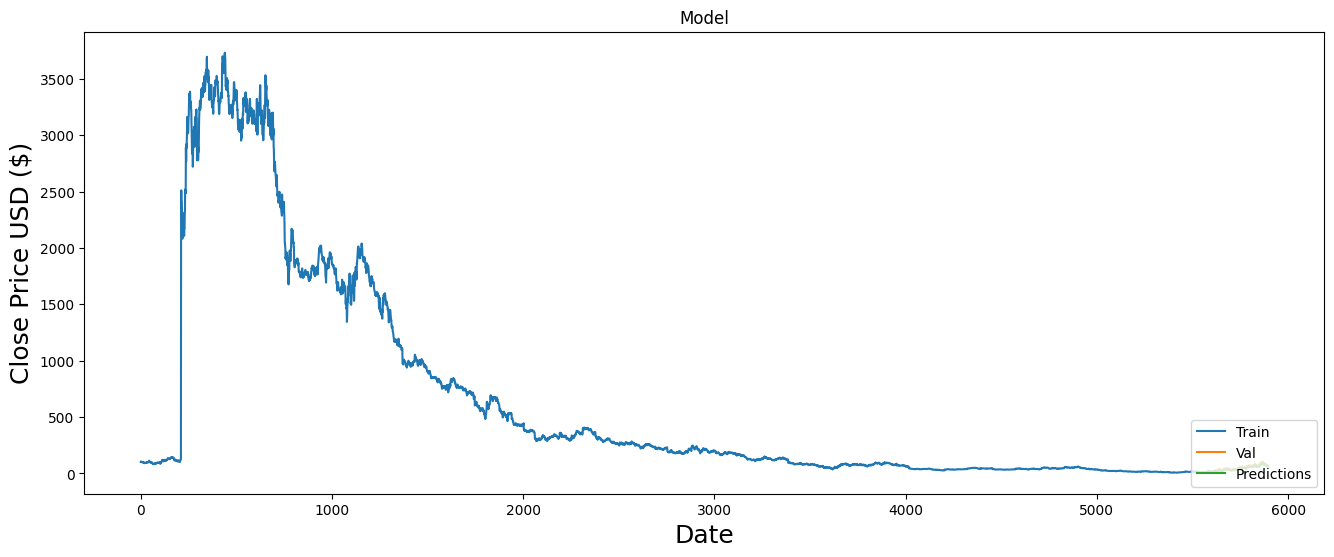

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

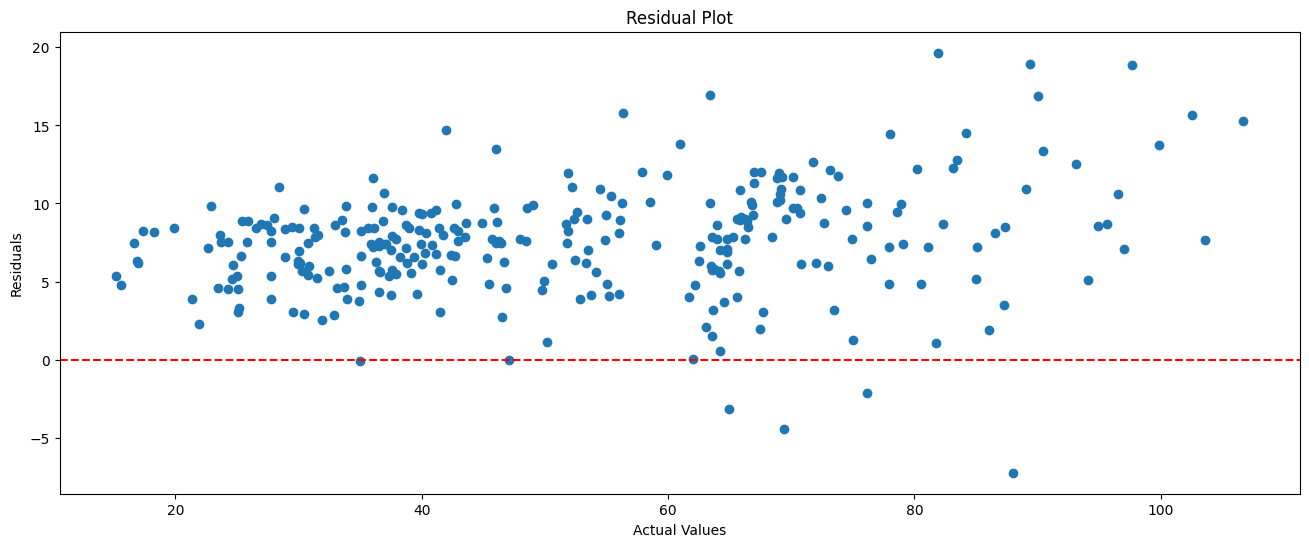

In [24]:
# Create a residual plot
residuals = y_test - predictions
plt.figure(figsize=(16,6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()
